In [ ]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"iitm21f1001463","key":"337fa2cf6c664121073b675cd7ee7ba7"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Download data from Kaggle and unzip the dataset

In [ ]:
!kaggle datasets download -d mdwaquarazam/agricultural-crops-image-classification

 89% 70.0M/79.0M [00:00<00:00, 105MB/s]
100% 79.0M/79.0M [00:00<00:00, 97.9MB/s]


In [ ]:
!unzip "/content/agricultural-crops-image-classification.zip" -d /content

Archive:  /content/agricultural-crops-image-classification.zip
  inflating: /content/Agricultural-crops/Cherry/image15.jpeg  
  inflating: /content/Agricultural-crops/Cherry/image16.jpeg  
  inflating: /content/Agricultural-crops/Cherry/image17.jpeg  
  inflating: /content/Agricultural-crops/Cherry/image18.jpeg  
  inflating: /content/Agricultural-crops/Cherry/image20.jpeg  
  inflating: /content/Agricultural-crops/Cherry/image21.jpeg  
  inflating: /content/Agricultural-crops/Cherry/image22.jpeg  
  inflating: /content/Agricultural-crops/Cherry/image24.jpeg  
  inflating: /content/Agricultural-crops/Cherry/image25.jpeg  
  inflating: /content/Agricultural-crops/Cherry/image27.jpeg  
  inflating: /content/Agricultural-crops/Cherry/image28.jpeg  
  inflating: /content/Agricultural-crops/Cherry/image29.jpeg  
  inflating: /content/Agricultural-crops/Cherry/image30.jpeg  
  inflating: /content/Agricultural-crops/Cherry/image31.jpeg  
  inflating: /content/Agricultural-crops/Cherry/images1

## Import necessary libraries

In [ ]:
import os

import matplotlib.pyplot as plt
from matplotlib.image import imread
#from skimage import io

import tensorflow as tf

from tensorflow.keras.layers import Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3

## Set up data generators and directories

In [ ]:
dir = "./Agricultural-crops"

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

In [ ]:
HEIGHT = 224
WIDTH = 224
BATCH_SIZE = 32
EPOCHS = 30

## Train and validation generators

In [ ]:
train_generator = datagen.flow_from_directory(directory=dir,
                                              target_size=(WIDTH, HEIGHT),
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical",
                                              shuffle=True,
                                              seed=0,
                                              subset="training")

validation_generator = datagen.flow_from_directory(directory=dir,
                                              target_size=(WIDTH, HEIGHT),
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical",
                                              shuffle=True,
                                              seed=0,
                                              subset="validation")

Found 674 images belonging to 30 classes.
Found 155 images belonging to 30 classes.


## Buid and compile the model

In [ ]:
# Learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(WIDTH, HEIGHT, 3)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu"),
    Dropout(0.5),
    tf.keras.layers.Dense(units=30, activation='linear')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
simple_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(WIDTH, HEIGHT, 3)),
    BatchNormalization(),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu"),
    Dropout(0.5),
    tf.keras.layers.Dense(units=30, activation='softmax')
])

In [ ]:
simple_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
model=simple_model

In [ ]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_285 (Conv2D)         (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_285 (B  (None, 222, 222, 32)      128       
 atchNormalization)                                              
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_286 (Conv2D)         (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_286 (B  (None, 109, 109, 64)      256       
 atchNormalization)                                              
                                                      

## Train the model

In [ ]:
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs=EPOCHS)


Epoch 1/30
22/22 [==============================] - 15s 404ms/step - loss: 3.5254 - accuracy: 0.0267 - val_loss: 3.4010 - val_accuracy: 0.0516
Epoch 2/30
22/22 [==============================] - 7s 299ms/step - loss: 3.4024 - accuracy: 0.0371 - val_loss: 3.3987 - val_accuracy: 0.0323
Epoch 3/30
22/22 [==============================] - 8s 381ms/step - loss: 3.3986 - accuracy: 0.0386 - val_loss: 3.3917 - val_accuracy: 0.0387
Epoch 4/30
22/22 [==============================] - 12s 571ms/step - loss: 3.3693 - accuracy: 0.0445 - val_loss: 3.3661 - val_accuracy: 0.0645
Epoch 5/30
22/22 [==============================] - 13s 622ms/step - loss: 3.3162 - accuracy: 0.0638 - val_loss: 3.3442 - val_accuracy: 0.0839
Epoch 6/30
22/22 [==============================] - 9s 411ms/step - loss: 3.2640 - accuracy: 0.0875 - val_loss: 3.3217 - val_accuracy: 0.1032
Epoch 7/30
22/22 [==============================] - 9s 411ms/step - loss: 3.2154 - accuracy: 0.1039 - val_loss: 3.2616 - val_accuracy: 0.1097
Epo

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    callbacks=[lr_schedule]
)

Epoch 1/30
22/22 [==============================] - 21s 666ms/step - loss: 4.2397 - accuracy: 0.0579 - val_loss: 4.3457 - val_accuracy: 0.0323 - lr: 1.0000e-04
Epoch 2/30
22/22 [==============================] - 15s 685ms/step - loss: 3.3677 - accuracy: 0.0564 - val_loss: 7.9165 - val_accuracy: 0.0323 - lr: 1.0000e-04
Epoch 3/30
22/22 [==============================] - 14s 647ms/step - loss: 3.3962 - accuracy: 0.0519 - val_loss: 12.2212 - val_accuracy: 0.0323 - lr: 1.0000e-04
Epoch 4/30
22/22 [==============================] - 14s 644ms/step - loss: 3.4175 - accuracy: 0.0549 - val_loss: 14.4796 - val_accuracy: 0.0323 - lr: 1.0000e-04
Epoch 5/30
22/22 [==============================] - 14s 654ms/step - loss: 3.4214 - accuracy: 0.0608 - val_loss: 14.8696 - val_accuracy: 0.0323 - lr: 1.0000e-04
Epoch 6/30
22/22 [==============================] - 14s 654ms/step - loss: 3.3049 - accuracy: 0.0623 - val_loss: 15.0643 - val_accuracy: 0.0323 - lr: 1.0000e-04
Epoch 7/30
22/22 [==================

## Visualize training history

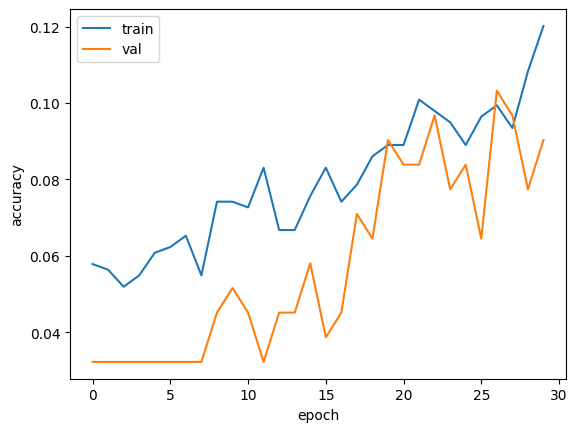

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Loss Plot

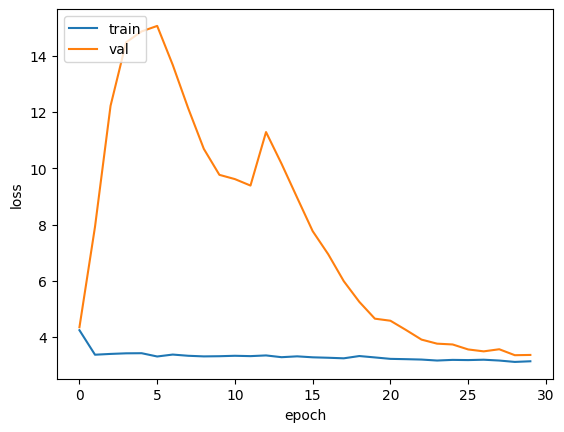

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Through ResNet50 model

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(WIDTH, HEIGHT, 3))
base_model.trainable = False

resnet_model = tf.keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    tf.keras.layers.Dense(units=128, activation="relu"),
    Dropout(0.5),
    tf.keras.layers.Dense(units=30, activation='softmax')
])

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
resnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 30)                3870      
                                                      

In [ ]:
# Learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [ ]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

In [ ]:
# Train the model with the new architecture

resnet_history = resnet_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    callbacks=[lr_schedule]
)

Epoch 1/30
22/22 [==============================] - 15s 480ms/step - loss: 3.9713 - accuracy: 0.0326 - val_loss: 3.5462 - val_accuracy: 0.0387 - lr: 1.0000e-04
Epoch 2/30
22/22 [==============================] - 9s 422ms/step - loss: 3.9202 - accuracy: 0.0401 - val_loss: 3.5022 - val_accuracy: 0.0387 - lr: 1.0000e-04
Epoch 3/30
22/22 [==============================] - 7s 322ms/step - loss: 3.7862 - accuracy: 0.0415 - val_loss: 3.4738 - val_accuracy: 0.0387 - lr: 1.0000e-04
Epoch 4/30
22/22 [==============================] - 9s 402ms/step - loss: 3.8093 - accuracy: 0.0326 - val_loss: 3.4551 - val_accuracy: 0.0387 - lr: 1.0000e-04
Epoch 5/30
22/22 [==============================] - 7s 327ms/step - loss: 3.6825 - accuracy: 0.0252 - val_loss: 3.4384 - val_accuracy: 0.0452 - lr: 1.0000e-04
Epoch 6/30
22/22 [==============================] - 8s 346ms/step - loss: 3.6562 - accuracy: 0.0267 - val_loss: 3.4313 - val_accuracy: 0.0387 - lr: 1.0000e-04
Epoch 7/30
22/22 [===========================

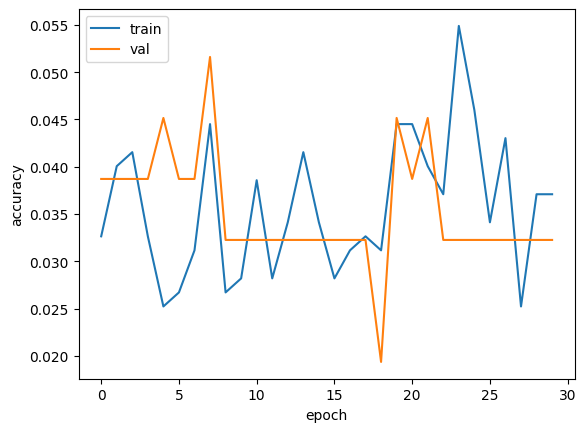

In [ ]:
plt.plot(resnet_history.history['accuracy'])
plt.plot(resnet_history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

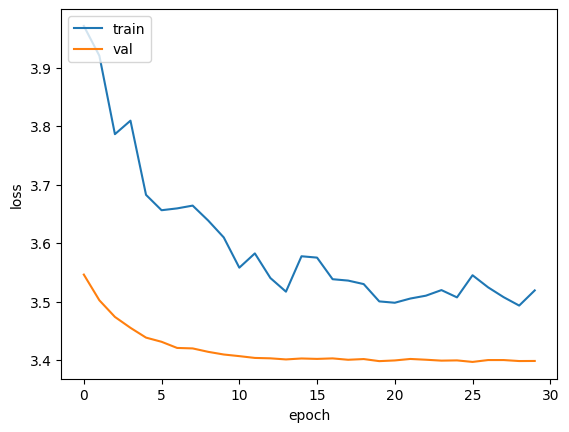

In [ ]:
plt.plot(resnet_history.history['loss'])
plt.plot(resnet_history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Through InceptionV3

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(WIDTH, HEIGHT, 3))
base_model.trainable = True  # Allow fine-tuning

# Fine-tune only the last few layers of the InceptionV3 model
for layer in base_model.layers[:-30]:
    layer.trainable = False

inception_model = tf.keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.6),
    tf.keras.layers.Dense(units=512, activation="relu"),
    Dropout(0.6),
    tf.keras.layers.Dense(units=30, activation='softmax')
])

In [ ]:
inception_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
inception_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_4  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_10 (Dropout)        (None, 2048)              0         
                                                                 
 dense_12 (Dense)            (None, 512)               1049088   
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 30)                15390     
                                                      

In [ ]:
# Learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

In [ ]:
# Train the model with the new architecture
inception_history = inception_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=70,
    callbacks=[lr_schedule]
)

Epoch 1/70
22/22 [==============================] - 22s 703ms/step - loss: 3.9715 - accuracy: 0.0430 - val_loss: 3.3581 - val_accuracy: 0.0645 - lr: 5.0000e-05
Epoch 2/70
22/22 [==============================] - 15s 668ms/step - loss: 3.8119 - accuracy: 0.0534 - val_loss: 3.2318 - val_accuracy: 0.0968 - lr: 5.0000e-05
Epoch 3/70
22/22 [==============================] - 15s 670ms/step - loss: 3.7282 - accuracy: 0.0638 - val_loss: 3.0642 - val_accuracy: 0.2194 - lr: 5.0000e-05
Epoch 4/70
22/22 [==============================] - 14s 658ms/step - loss: 3.4390 - accuracy: 0.0905 - val_loss: 3.0416 - val_accuracy: 0.2323 - lr: 5.0000e-05
Epoch 5/70
22/22 [==============================] - 15s 666ms/step - loss: 3.4712 - accuracy: 0.0772 - val_loss: 3.0000 - val_accuracy: 0.2194 - lr: 5.0000e-05
Epoch 6/70
22/22 [==============================] - 16s 721ms/step - loss: 3.2573 - accuracy: 0.1068 - val_loss: 2.9512 - val_accuracy: 0.2710 - lr: 5.0000e-05
Epoch 7/70
22/22 [======================

In [ ]:
history = inception_history

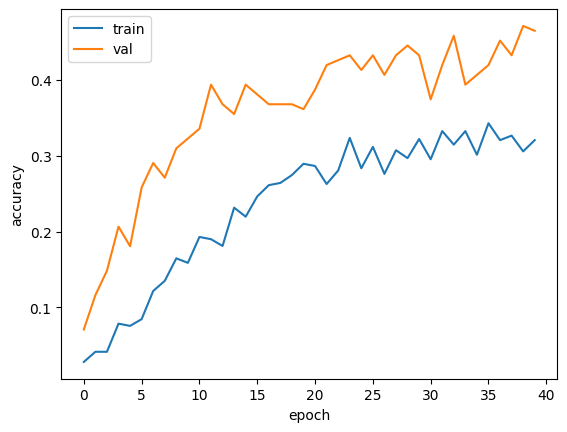

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

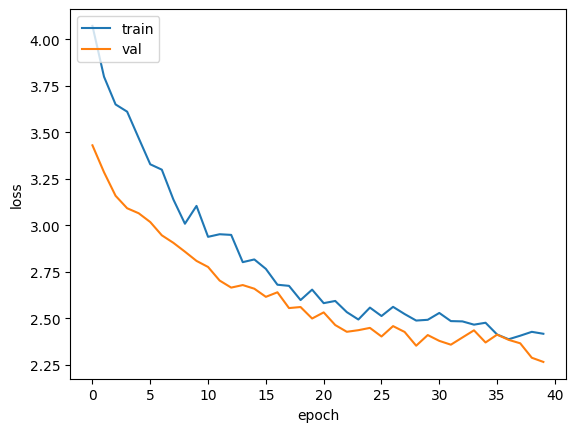

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
train_generator.class_indices

{'Cherry': 0,
 'Coffee-plant': 1,
 'Cucumber': 2,
 'Fox_nut(Makhana)': 3,
 'Lemon': 4,
 'Olive-tree': 5,
 'Pearl_millet(bajra)': 6,
 'Tobacco-plant': 7,
 'almond': 8,
 'banana': 9,
 'cardamom': 10,
 'chilli': 11,
 'clove': 12,
 'coconut': 13,
 'cotton': 14,
 'gram': 15,
 'jowar': 16,
 'jute': 17,
 'maize': 18,
 'mustard-oil': 19,
 'papaya': 20,
 'pineapple': 21,
 'rice': 22,
 'soyabean': 23,
 'sugarcane': 24,
 'sunflower': 25,
 'tea': 26,
 'tomato': 27,
 'vigna-radiati(Mung)': 28,
 'wheat': 29}

## Save the model

In [ ]:
model = inception_model

In [ ]:
model.save('crop_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
resnet_model.save('crop_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
inception_model.save('crop_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Load the saved model for testing

In [ ]:
loaded_model = tf.keras.models.load_model('crop_classification_model.h5')

## Test the model on a new image

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
def preprocess_image(file_path):
    img = image.load_img(file_path, target_size=(WIDTH, HEIGHT))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize
    return img_array

In [ ]:
import random

def preprocess_image(file_path):
    img = image.load_img(file_path)
    width, height = img.size

    # Randomly crop a 224x224 region (adjust size as needed)
    x = random.randint(0, width - 224)
    y = random.randint(0, height - 224)
    crop_img = img.crop((x, y, x + 224, y + 224))

    img_array = image.img_to_array(crop_img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize
    return img_array

In [ ]:
test_image_path = '/content/test_img.jpg'
preprocessed_image = preprocess_image(test_image_path)
predictions = model.predict(preprocessed_image)
predicted_class = np.argmax(predictions)

1/1 [==============================] - 4s 4s/step


In [ ]:
new_predictions = loaded_model.predict(preprocessed_image)
new_predicted_class = np.argmax(new_predictions)

1/1 [==============================] - 1s 1s/step


In [ ]:
print(predicted_class)
print(new_predicted_class)

28
28


## Get the class name for the predicted class

In [ ]:
class_indices = train_generator.class_indices

# Invert the dictionary to get a mapping from indices to class names
inverse_class_indices = {v: k for k, v in class_indices.items()}

# Example usage to get the class name for new_predicted_class
class_name = inverse_class_indices[new_predicted_class]

print(f'The predicted class is: {class_name}')

The predicted class is: vigna-radiati(Mung)
